In [1]:
import numpy as np
import gprob as gp

import matplotlib.pyplot as plt

np.random.seed(0)

In [2]:
def rbf(x, y, sigma=0.2):
    """RBF kernel function, <f(x)*f(y)>."""
    return np.exp(-(x - y)**2 / (2 * sigma**2))

# Points to evaluate the process at.
npoints = 1000
x1 = np.random.rand(npoints)

# Observed values.
x2 = [0.1, 0.3, 0.6, 0.8]
y2 = [0.2, -0.1, 1., 0.3]

x = np.concatenate([x1, x2])

v = gp.normal(0, rbf(x[:, None], x[None, :]))
vf = v[-len(x2):]  # The points to be fixed later.

# Sorting in the order of increasing x.
idx = np.argsort(x)
x = x[idx]
v = v[idx]

# Conditioning upon the fixed points.
vc = v | {vf: y2}

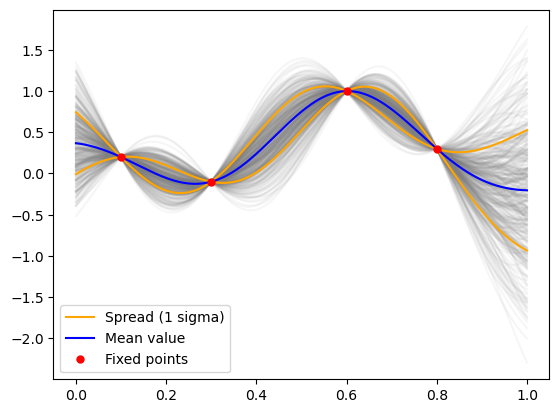

In [3]:
nsamples = 400
plt.plot(x, vc.sample(nsamples).T, color="gray", alpha=0.07)
plt.plot(x, vc.mean() + np.sqrt(vc.var()), color="orange", label="Spread (1 sigma)")
plt.plot(x, vc.mean() - np.sqrt(vc.var()), color="orange")
plt.plot(x, vc.mean(), color="blue", label="Mean value")
plt.plot(x2, y2, ls="none", marker=".", ms=10., color="red", label="Fixed points")
plt.legend();